In [1]:
# Set project directory
import os
import sys


def project_dir():
    notebook_path = %pwd
    repo_name = "worldbank_data_exploration"
    repo_folder = notebook_path.split(repo_name)[0]
    return os.path.join(repo_folder, repo_name)


pwd = os.getenv("PWD", project_dir())
os.environ["PWD"] = pwd
sys.path.append(pwd)

In [2]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Dataset

In [3]:
from data_sources.load_dataset import load_time_series

time_series_dict, countries, years = load_time_series()

In [4]:
time_series_dict.keys()

dict_keys(['Access to electricity (% of population)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Age dependency ratio (% of working-age population)', 'Agricultural land (% of land area)', 'Agriculture, forestry, and fishing, value added (% of GDP)', 'Arable land (% of land area)', 'Arable land (hectares per person)', 'Birth rate, crude (per 1,000 people)', 'Cereal yield (kg per hectare)', 'Crop production index (2014-2016 = 100)', 'Death rate, crude (per 1,000 people)', 'Employment in agriculture, female (% of female employment) (modeled ILO estimate)', 'Employment in agriculture, male (% of male employment) (modeled ILO estimate)', 'Exports of goods and services (% of GDP)', 'Fertility rate, total (births per woman)', 'Fertilizer consumption (kilograms per hectare of arable land)', 'Food production index (2014-2016 = 100)', 'Forest area (% of land area)', 'GDP growth (annual %)', 'GDP per capita (current US$)', 'GNI per capita, Atlas method (current US$)', 'Gros

# Utils

In [5]:
def plot_normal(X, y, legend=False):
    plt.figure(figsize=(8, 8))
    for i in range(X.shape[0]):
        plt.scatter(X[i, 0], X[i, 1], label=y[i])

    if legend:
        plt.legend()
    plt.show()


def plot_with_names(
    X,
    y,
    specific_list=[
        [
            "Poland",
            "Germany",
            "Czech Republic",
            "Slovak Republic",
            "France",
            "United Kingdom",
        ],
        ["United States", "China", "Singapore"],
        ["Kenya", "Madagascar", "Nigeria"],
    ],
):
    plt.figure(figsize=(16, 16))

    mask = np.in1d(y, np.array(specific_list).flatten())
    plt.scatter(X[np.logical_not(mask)][:, 0], X[np.logical_not(mask)][:, 1])
    for specific in specific_list:
        mask = np.in1d(y, specific)
        plt.scatter(X[mask][:, 0], X[mask][:, 1])

    for i in range(X.shape[0]):
        plt.annotate(y[i], [X[i, 0], X[i, 1]], size=7.5)

    # plt.legend()
    plt.show()

# NO feature extraction - single time series type

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from umap import UMAP

from feature_extraction import AutoencoderExtractor

feature = "Access to electricity (% of population)"
INPUT_LEN = 19

C:\Users\MatiX\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


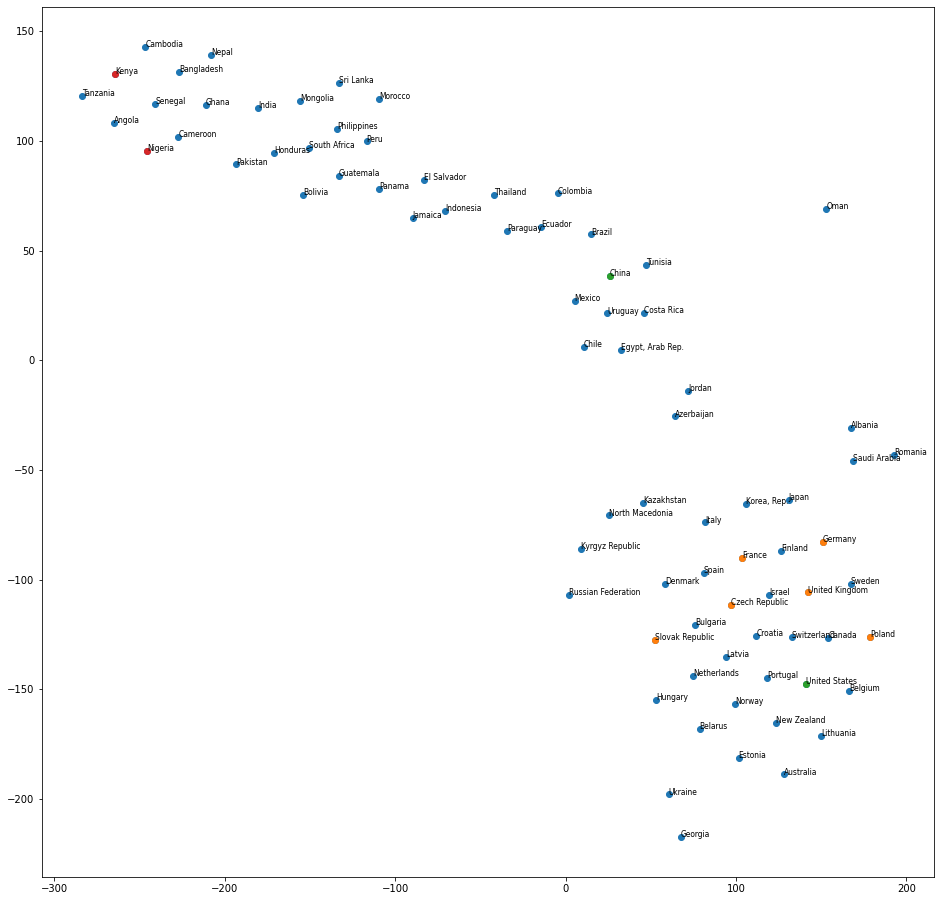

In [7]:
Y_projected = TSNE(2, perplexity=20, n_iter=4000).fit_transform(
    time_series_dict[feature]
)

plot_with_names(Y_projected, countries)

# Feature extraction - single time series type

In [8]:
extractor = AutoencoderExtractor(feature, root=pwd, input_len=INPUT_LEN)
Y = extractor.extract_features(time_series_dict[feature])
Y.shape

(79, 5)

In [9]:
Y_projected = TSNE(2, perplexity=24).fit_transform(Y)
Y_projected.shape

(79, 2)

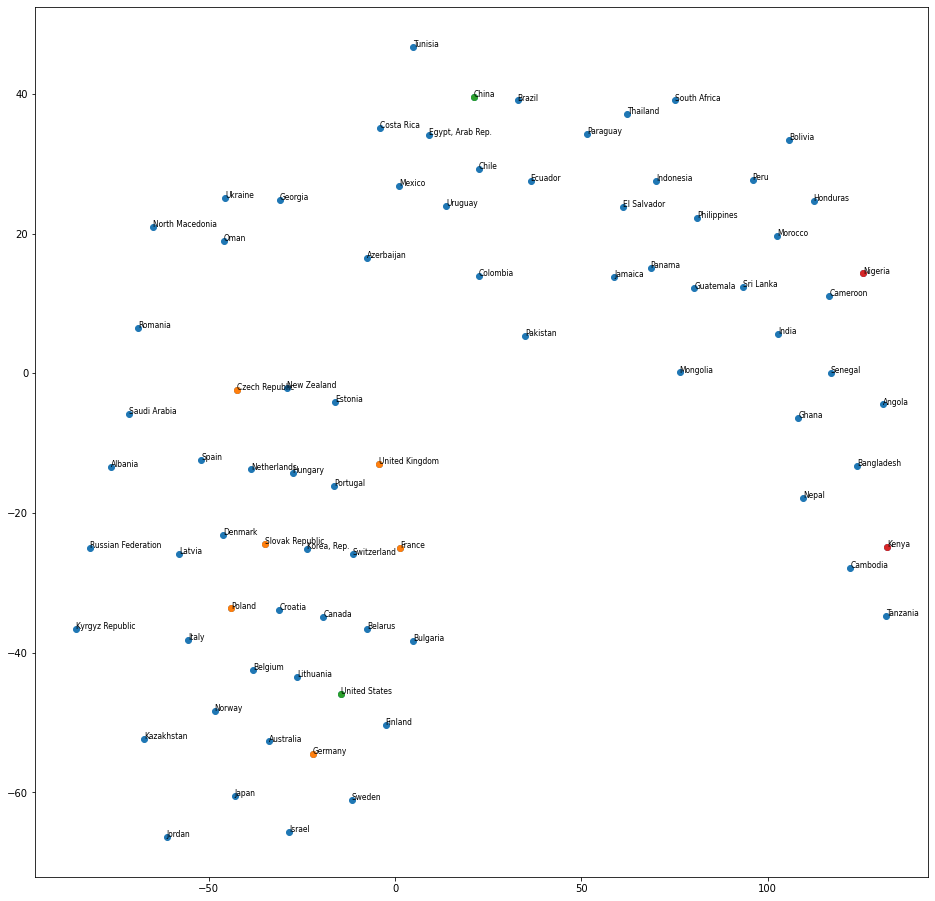

In [10]:
plot_with_names(Y_projected, countries)

# NO feature extraction - all time series

In [11]:
Y_all = np.hstack(list(time_series_dict.values()))

# Y_all_projected_base = PCA(2).fit_transform(Y_all)
Y_all_projected_base = TSNE(2, perplexity=10, n_iter=4000).fit_transform(Y_all)
# Y_all_projected_base = MDS(2).fit_transform(Y_all)
# Y_all_projected_base = UMAP(n_components=2).fit_transform(Y_all)

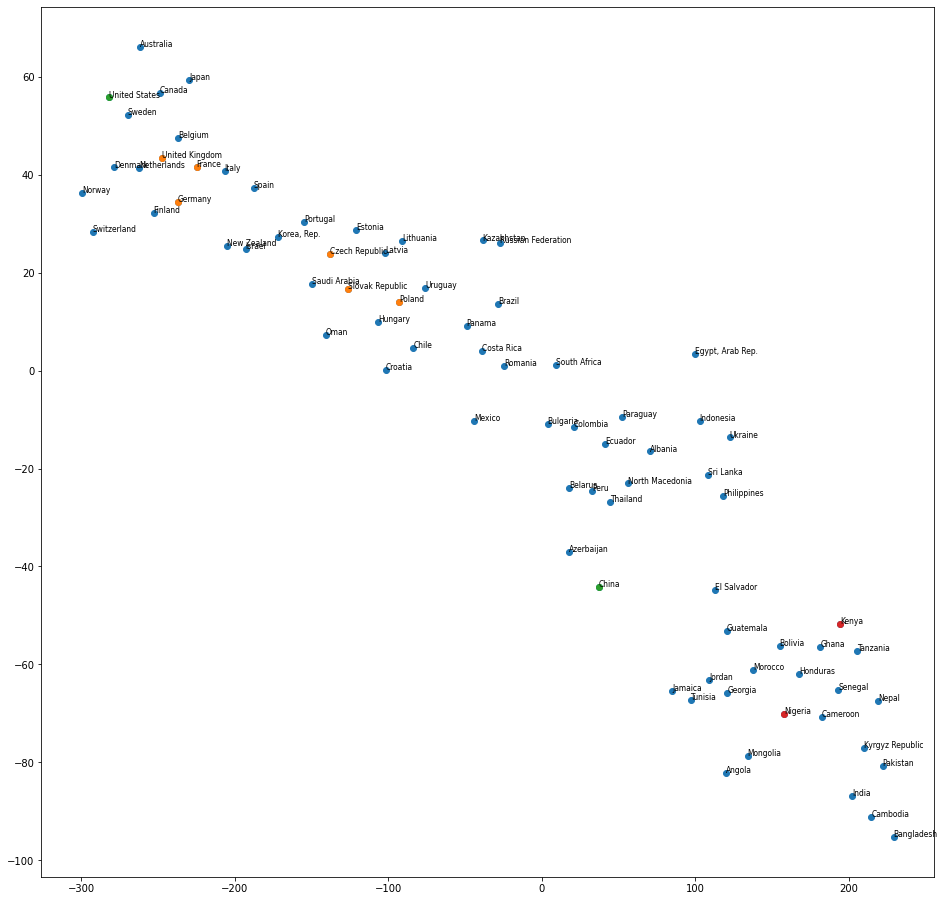

In [12]:
plot_with_names(Y_all_projected_base, countries)

# Feature extraction - all time series types

In [13]:
Y_all = []

for feature, X in time_series_dict.items():
    extractor = AutoencoderExtractor(feature, root=pwd, input_len=INPUT_LEN)
    Y_feature = extractor.extract_features(X)
    Y_all.append(Y_feature)

Y_all = np.hstack(Y_all)
print(Y_all.shape)

# Y_all_projected_extr = PCA(2).fit_transform(Y_all)
Y_all_projected_extr = TSNE(2, perplexity=4, n_iter=4000).fit_transform(Y_all)
# Y_all_projected_extr = MDS(2).fit_transform(Y_all)
# Y_all_projected_extr = UMAP(n_components=2).fit_transform(Y_all)

(79, 215)


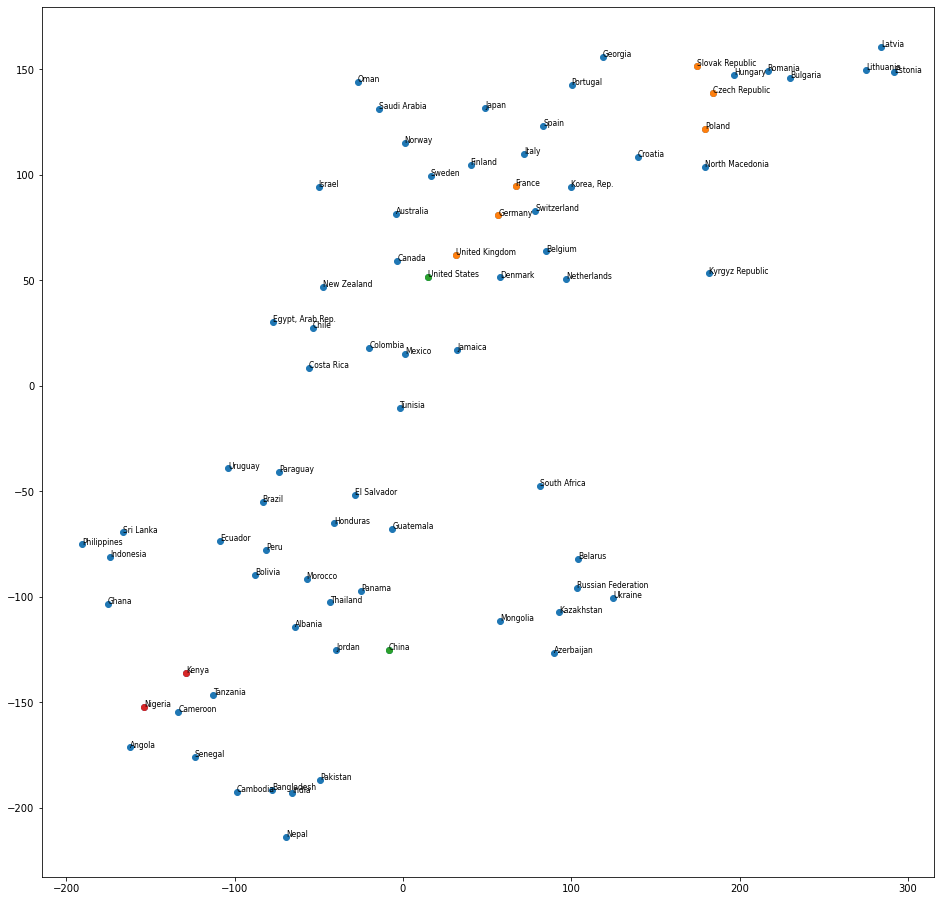

In [14]:
plot_with_names(Y_all_projected_extr, countries)